# Passage par valeur ou référence

Voici une base essentielle de la programmation : le passage par "valeur" ou par "référence" ($\simeq$ "adresse").
Si vous comprenez ce TP, vous vous éviterez bien des erreurs.
Notez qu'il s'agit d'une "simplification" de la réalité,
mais qu'elle marchera tout le temps dans la plupart des langages.

## Primitif


Appelons 'primitif' une structure de donnée qui peut être

* un entier (`int`)
* un flotant (`float`)
* une chaine de caractère (`string`)






Du coup, n'est pas  pas une briques:


* une liste
* un tuple
* un dictionnaire
* un tableau numpy
* un objet maison

A même niveau que les primitifs il y a les 'références' qui sont des adresses qui pointe vers des données en mémoire.   

**Chaque variable (`a`,`b`, `c`, `toto`) contient soit un primitif, soit une référence.**

In [ ]:
a = "bonjour"       #"bonjour" est stocké dans a
b = 123             #123 est stocké dans b
c = {'x':3,'y':5}   #l'adresse du dictionnaire est stocké dans c

print(a)
print(b)
print(c)

***A vous:*** Est-ce que la fonction print affiche le contenu d'une variable?

Réponse: Non




In [ ]:
print(a)            #affiche le contenu de a
print(b)            #affiche le contenu de b
print(c)            #va chercher l'objet à l'adresse indiqué dans c, puis va faire appelle à la méthode __repr__ de l'objet.

In [ ]:
# print(c) c'est comme
print(c.__repr__())

Créons une classe qui n'a pas de méthode `__repr__`

In [ ]:
class Toto:
    def __init__(self):
        self.a=5
toto=Toto()
print(toto)


Ajoutons lui une méthode `__repr__`:


In [ ]:
class Toto:
    def __init__(self):
        self.a=5

    def __repr__(self):
        return "je suis un objet de type 'Toto' et mon attribut est a:"+str(self.a)
toto=Toto()
print(toto)

## Affectation

A chaque affectation (`a=b`) entre variables, le contenue de la variable de droite (`b`) est COPIÉ vers celle de gauche (`a`).

Que ce contenu soit primitif ou une référence.
    
Mais quand on copie une référence, l'objet sous-jacent n'est pas copié!!! C'est le fameux passage par référence (=par adresse) qui pose tant de problèmes aux débutants en informatique.

Mais ce passage par référence rend l'informatique rapide: on ne copie jamais de gros paquets de donnée, mais seulement des références, pas plus grosse qu'un float.

***A vous:***

In [1]:
a = "bonjour"
b = 123
c = {'x':3}
d = (1,2)
e = [1,2]

aa=a
bb=b
cc=c
dd=d
ee=e

aa+=" les gars"
bb+=10000
cc['x']=7
dd+=(3,)
ee.append(3)

Deviner ce que donnerais maintenant:

    print(a)
    print(b)
    print(c)
    print(d)
    print(e)

***Remarque:*** Certain langages (comme R, matlab) considère les tableaux comme des objets immutable.

Cela évite les bugs de débutant, mais cela provoque des pertes de performance.

## Le ramasse miette


Les langages 'moderne' ont un ramasse miette intégré: c'est un outil qui détruit les données dés lors que
plus aucune référence ne pointe vers eux

In [ ]:
point1={'x':3,'y':5}
""" on crée un nouvelle variable point2 qui reçoit le contenu de point1 (donc une référence vers un dico)"""
point2=point1


""" on vide la variable point2.  """
point2=None
"""pour autant on ne détruit pas l'objet sous-jacent"""
print("point1:",point1)
"""  on vide la variable point1 aussi """
point1=None
"""il n'y a plus personne qui pointe vers l'objet sous-jacent, qui sera alors détruit par le ramasse miette"""


***Avancé:*** Attention: même l'instruction `del` de python ne détruit pas l'objet sous-jacent, comme le montre l'expérience suivante:

In [ ]:
point1={'x':3,'y':5}
point2=point1
del point2
print(point1)

- L'instruction `del point2` détruit la variable (elle devient `undefined`)
- alors que `point2=None` vide la variable (mais elle existe encore).

N'utilisez jamais `del`, cela ne sert à rien, et cela peut engendrer des erreurs comme ci-dessous:

    a=3
    del a
    print(a==None)

On pourrait s'attendre à "true" mais cela provoque:

    NameError: name 'a' is not defined

## Appel de fonction


Un appel de fonction cache la création d'un variable et une affectation.

 Et on oublie souvent cela!

Comparons 2 programmes:


In [ ]:
def toto(b):
    b=8

b=5
toto(b)
print(b)

La variable `b` n'a pas du tout était affectée par la fonction `toto`. Le programme ci-dessus pourrait  est l'équivalent de ceci:

    b = 5
    toto_b = b
    toto_b = 8
    print(b)


Par contre, si on passe une adresse en argument de la fonction:

In [ ]:
def toto2(b:dict):
    b['x']=7

b={'x':3,'y':5}
toto2(b)
print(b) #b a été modifié


## Tuple

Mais on a oublié les tuples. Ils peuvent être composés de primitifs ou de référence, ou d'un mélange des deux.

Quand on fait une affectation d'un tuple, tout son contenu est copié. Mais s'il y a des référence dans ce tuple, c'est les références qui sont copiées, et non pas les objets sous-jacents.

In [ ]:
a=(5,7)
b=a
b*=2
print(a)
print(b)

***A vous:*** Et que donne ceci?

    a=[5,7]
    b=a
    b*=2
    print(a)
    print(b)

lors de l'affectation `b=a`  le couple (5,7) a été copié et transmis dans la variable `b`.

Comme les string ou les nombres, quand on crée un tuple, on le stock directement dans la variable.

Les tuples ne sont pas référencés; on dit aussi qu'ils sont immutable.

Mais attention, si le tuple contient lui même des références, il devient partiellement "mutable"  

In [ ]:
a =({'x':1},7)
b=a
b[0]['x']=2
print(a)

C'est piégeux, mais pas du tout illogique.

***A vous:*** Essayer de modifier le second élément du tuple: `b[1]=14`. Que ce passe-t-il ?

## Numpy

Révisons le passage par "vue" de numpy qui est un passage par référence.

In [ ]:
import numpy as np
mat_un = np.ones(shape=[5, 4])
mat_un

In [ ]:
part=mat_un[0:2, 0:3]
part

In [ ]:
"""toute la partie est mise à 7"""
part[:,:]=7

"""et là, observez : c'est à la fois logique et surprenant:"""
print("mat_un\n", mat_un)
print("\n part\n", part)

Comment ça marche: Losqu'on effectue

        mat_un = np.ones(shape=[5, 4])
        
l'ordinateur crée un tableau dans sa mémoire. `mat_un` est une vue (=une référence) sur l'intégralité de ce tableau.  Puis quand on fait:
        
        part=mat_un[0:2, 0:3]
        
 la variable `part` est une vue sur une partie de ce tableau. En effectuant :
        
        part[:,:]=7
        
on modifie une partie du tableau.

Par contre quand on fait :
        
        a=mat_un[0,0]
        
la variable `a` contient une copie du coefficient `mat_un[0,0]`. Modifier `a` ne modifie pas le tableau en mémoire. La preuve :

In [ ]:
mat_un = np.ones(shape=[5, 4])
a=mat_un[0,0]
a=7
print('a=',a)
print("\n mat_un\n", mat_un)

In [ ]:
a=np.ones([4])
b=a
b[:2]=2
print(a)

# Des gags de variables

## Déclarer une variable

En python il n'y a pas de mot clé pour définir une variable. Une affectation suffit:


Autre language
    
    var a: int #on déclare une variable de type entier
    a=4 #on l'affecte

Variante 2 en 1:

    int a=4


Python  

    a=4






En python les blocs de codes sont définis par une indentation (quand par exemple beaucoup d'autre language utilise une accolade).


Contrairement d'autres languages, un bloc de code en python n'emprisone pas les variables qui y sont définies.

In [ ]:
a=3
if a==3:
    c=1
    b=5*c
    print(b)
else:
    d=2
    b=6*d
    print(b)
#ici en python, les variables a,b,c,d sont accessibles. C'est moche si on n'en a pas besoin pour la suite
#dans d'autre language, seul la variable a serait accessible

Heureusement en python, les fonction emprisonne les variables. Il y a donc une astuce pour emprisonner des variables:

In [ ]:
a=3
if a==3:
    def _():
        c=1
        b=5*c
        print(b)
    _()
else:
    def _():
        d=2
        b=6*d
        print(b)
    _()
#on a défini des fonction 'anonymes' uniquement pour emprisonner les variables locales.

Dans d'autre language, le code précédent aurait cette tête:

    int a=3
    if a==3:
        {
            int c=1
            int b=5*c
            print(b)
        }
    else:
        {
            int d=2
            int b=6*d
            print(b)
        }

## Le scope des variable

Les variables globales sont visibles à l'intérieur des fonctions:

In [2]:
glob=100
def look_at_glob():
    print(glob)

look_at_glob()

Et même, en moins naturel:

In [5]:
def look_at_glob2():
    print(glob2)


glob2=200


look_at_glob2()

Mais une variable déclarée dans une fonction n'existe pas à l'extérieur.

In [ ]:
glob=0
def try_to_change_glob():
    glob=7

try_to_change_glob()
print(glob)

Le programme précédent est l'équivalent de celui-ci:

    glob=0
    def try_to_change_glob():
        _glob=7

    try_to_change_glob()
    print(glob)

Par contre ci-dessous ça fonctionne (oui, c'est logique):

In [ ]:
glob={"a":0}
def change_glob():
    glob["a"]=7

change_glob()
print(glob)

## L'exo du compteur

***A vous:*** On veut creer un compteur global qui compte combien de fois une fonction est appelée. C'est l'échec.

Comment procéderiez-vous pour que le compteur fonctionne ?

In [6]:
counter_glob=0

def a_function():
    counter_glob=counter_glob+1
    #là immaginons que l'on fait plein de choses très intéressantes


try:
    for _ in range(5):
        a_function()
except Exception as e:
    print(e)

Pour comprendre ce bug regarder le programme ci-dessous qui bug aussi:

In [ ]:
glob=1

def a_function():
    print(glob)
    glob=0

a_function()

La re-définition de la variable glob dans la fonction va effacer la vraie variable globale. Le programme précédent est donc équivalent de:


    glob=1
    def a_function():
        print(glob_)
        glob_=0    
    
    a_function()

qui clairement ne peut pas fonctionner.

Astuce: à chaque fois qu'une variable est définie dans une fonction, changer son nom partout dans
                la fonction, y compris avant sa définition. Et vous verez si votre programme fonctionne.

Remarque: On voit qu'en python, une erreur peut être provoquer par une ligne de code située plus loin que l'erreur.

## Solution de l'exo

#### →♡♡♡

Solution 1: on passe le compteur en argument de la fonction

In [ ]:
def a_function(counter_glob):
    counter_glob=counter_glob+1
    return counter_glob
    #là immaginons que l'on fait plein de choses très intéressantes

...
for _ in range(5):
    ...
print(counter_glob)

    5

#### →♡♡♡

Solution 2: on passe une adresse en variable globale: par exemple l'adresse d'un dico.

In [ ]:
counter_glob={"nb":0}


...


for _ in range(5):
    a_function()

print(counter_glob["nb"])

    5

## Le gag de la boucle

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Observer: une seule fonction va être tracer au lieu de 10 comme on s'y attendrait.

In [ ]:
list_of_func=[]
for i in range(10):
    list_of_func.append(lambda x:i*x)

x=np.linspace(0,1,10)
for func in list_of_func:
    plt.plot(x,func(x))

Et ce n'est pas la faute à la lambda expression

In [ ]:
list_of_func=[]
for i in range(10):
    def linFunc(x):
        return i*x
    list_of_func.append(linFunc)

x=np.linspace(0,1,10)
for func in list_of_func:
    plt.plot(x,func(x))

Une variante encore plus étonnante:

In [ ]:
list_of_func=[]
for i in range(10):
    i_vec=np.array([i])
    print(i_vec)

    def linFunc(x):
        #on crée explicitement une copie
        i_vec_=i_vec.copy()
        return i_vec_*x

    list_of_func.append(linFunc)

x=np.linspace(0,1,10)
for func in list_of_func:
    plt.plot(x,func(x))

L'explication est simple: une fonction non évaluée, c'est comme du texte. Par exemple le premier programme est l'équivalent de celui-ci:

In [ ]:
list_of_func=[]
for i in range(10):
    list_of_func.append("lambda x:i*x")

x=np.linspace(0,1,10)
for func in list_of_func:
    plt.plot(x,eval(func)(x))

D'après vous: que font les programmes suivants:

    list_of_func=[]
    for i in range(10):
        list_of_func.append(lambda x:i*x)

    del i
    x=np.linspace(0,1,10)
    for func in list_of_func:
        plt.plot(x,func(x))



    list_of_func=[]
    for i in range(10):
        list_of_func.append(f"lambda x:{i}*x")

    x=np.linspace(0,1,10)
    for func in list_of_func:
        plt.plot(x,eval(func)(x))

## Solution au gag précédent

#### →♡♡♡

La solution: puisque notre fonction doit stoker un paramètre, il faut créer un objet:

In [ ]:
class LinFunc:
    def __init__(self,a):
        ...

    def compute(self,x):
        ...

list_of_func=[]
for i in range(10):
    list_of_func.append(LinFunc(i))

x=np.linspace(0,1,10)
for func in list_of_func:
    plt.plot(x,func.compute(x))

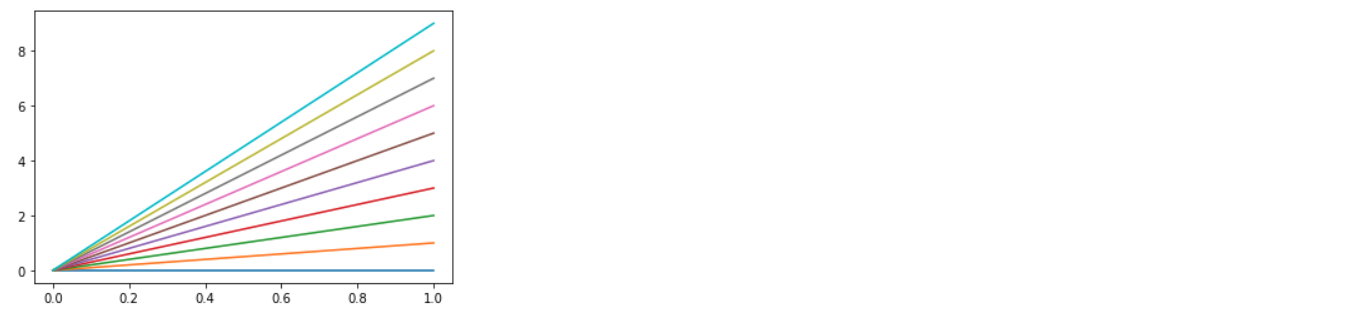

L'utilisation de la méthode `__call__`, qui rend `callable` un objet, peu même rendre le programme précédent plus éléguant:

In [ ]:
class LinFunc:
    def __init__(self,a):
        ...
    def __call__(self,x):
        ...

list_of_func=[]
for i in range(10):
    list_of_func.append(LinFunc(i))

x=np.linspace(0,1,10)
for func in list_of_func:
    plt.plot(x,func(x))

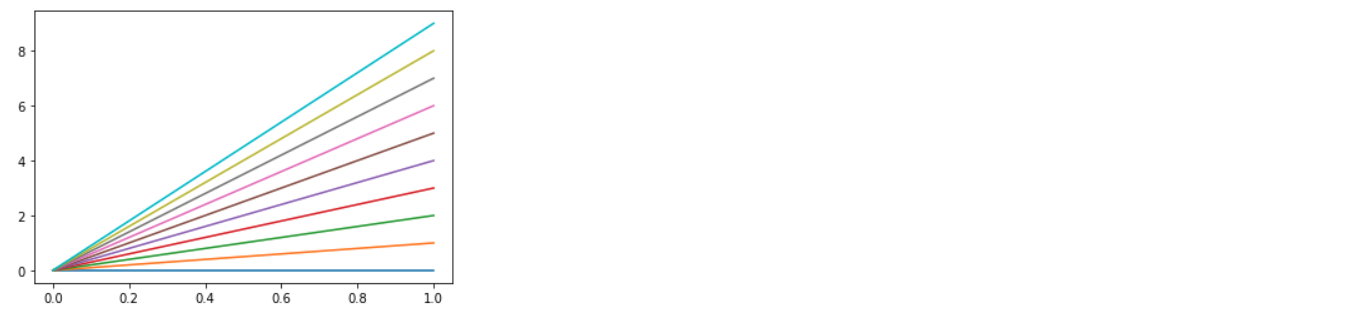